In [1]:
import pandas as pd
from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sn
pd.options.mode.chained_assignment = None 

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\data_nlp.tsv', sep='\t')

In [3]:
j=0
for i in data.iloc[:,2]:
    globals()[f"obj{j}"] = TextBlob(i)
    j=j+1

In [4]:
data['polarity']=0.00
data['polarity class']='test'
data['correct/false']=0

In [5]:
for i in range(len(data)):
    data['polarity'][i] = globals()[f"obj{i}"].sentiment.polarity

In [13]:
for i in range(len(data)): 
    if data['polarity'][i] >= -0.1 and data['polarity'][i] <= 0.1 :
        data['polarity class'][i] = 'neutral'
    elif data['polarity'][i] < -0.1:
        data['polarity class'][i] = 'negative'
    else:
        data['polarity class'][i] = 'positive'

In [14]:
for i in range(len(data)):
    if data['polarity class'][i] == data['sentiment'][i]:
        data['correct/false'][i]=1
    else:
        data['correct/false'][i]=0
j=0
for i in range(len(data)):
    if data['correct/false'][i]==1:
        j+=1
print('misclassified: ', j)

misclassified:  8313


In [15]:
data

,tweet_id,sentiment,text,polarity,polarity class,correct/false
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",-0.100000,neutral,1
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,-0.208333,negative,0
2,619974445185302528,neutral,If you could ask an onstage interview question...,0.000000,neutral,1
3,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,0.800000,positive,1
4,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday...",0.255682,positive,1
...,...,...,...,...,...,...
15646,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,0.000000,neutral,1
15647,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",0.000000,neutral,0
15648,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,-0.700000,negative,0
15649,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...,0.033333,neutral,0


In [16]:
report = classification_report(data['sentiment'], data['polarity class'])
print(report)

              precision    recall  f1-score   support

    negative       0.34      0.34      0.34      2310
     neutral       0.60      0.54      0.57      7839
    positive       0.52      0.60      0.56      5502

    accuracy                           0.53     15651
   macro avg       0.49      0.49      0.49     15651
weighted avg       0.54      0.53      0.53     15651



In [17]:
accuracy = j/len(data)
precision = precision_score(data['sentiment'], data['polarity class'], average='macro')
recall = recall_score(data['sentiment'], data['polarity class'], average='macro')
f1 = f1_score(data['sentiment'], data['polarity class'], average='macro')
print('precision:',precision,'  recall:',recall,'  f1 score:',f1,'  accuracy:',accuracy)

precision: 0.48769432010994995   recall: 0.4935376385416262   f1 score: 0.4891380912363843   accuracy: 0.5311481694460418


In [18]:
cm = confusion_matrix(data['sentiment'], data['polarity class'])

print(cm)

[[ 792  983  535]
 [1138 4230 2471]
 [ 429 1782 3291]]


<AxesSubplot:>

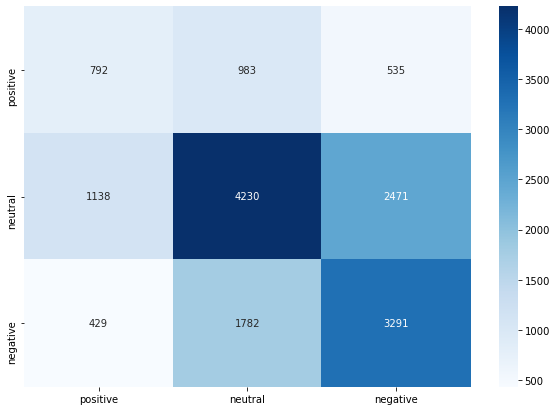

In [19]:
df_cm = pd.DataFrame(cm, index = [i for i in ['positive', 'neutral', 'negative']],
                  columns = [i for i in  ['positive', 'neutral', 'negative']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')